In [2]:
from methods.reader import Reader
from methods.visualize import show_xca_image, image_to_gif

from config import CADICA_DATASET_DIR

r = Reader(dataset_dir=CADICA_DATASET_DIR)

[19:57:33][reader.Reader._load_cadica] "Building XCA images from the CADICA dataset."


In [3]:
lesion_frame = r.get(lesion=True)
lesion_frame

XCAImage(patient=30, video=3, frame=18, width=512, height=512, bbox(es)=[248, 76, 300, 109], stenosis_severity=(90, 98), dataset=CADICA)

In [4]:
lesion_videos = r.get(patient_id=1, lesion=True, return_videos=True)
lesion_videos

[XCAImage(patient=1, video=2, frame=15, width=512, height=512, bbox(es)=[257, 123, 299, 178], stenosis_severity=(0, 20), dataset=CADICA),
 XCAImage(patient=1, video=2, frame=16, width=512, height=512, bbox(es)=[221, 100, 313, 189], stenosis_severity=(0, 20), dataset=CADICA),
 XCAImage(patient=1, video=2, frame=17, width=512, height=512, bbox(es)=[218, 110, 319, 210], stenosis_severity=(0, 20), dataset=CADICA),
 XCAImage(patient=1, video=2, frame=18, width=512, height=512, bbox(es)=[270, 146, 317, 192], stenosis_severity=(0, 20), dataset=CADICA),
 XCAImage(patient=1, video=2, frame=19, width=512, height=512, bbox(es)=[277, 143, 313, 198], stenosis_severity=(0, 20), dataset=CADICA),
 XCAImage(patient=1, video=2, frame=21, width=512, height=512, bbox(es)=[280, 135, 316, 183], stenosis_severity=(0, 20), dataset=CADICA),
 XCAImage(patient=1, video=2, frame=29, width=512, height=512, bbox(es)=[260, 123, 313, 190], stenosis_severity=(0, 20), dataset=CADICA),
 XCAImage(patient=1, video=2, fram

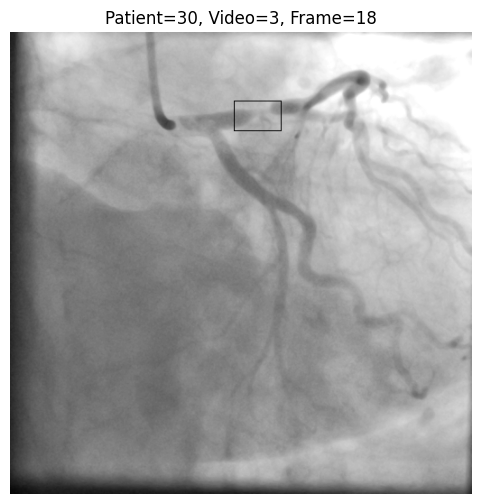

In [5]:
sample_lesion_frame = r.get(lesion=True)
show_xca_image(lesion_frame)

In [6]:
# lets try a gif
from IPython.display import Image, display

p1_v2_lesion = r.get(patient_id=1, video_id=1, lesion=True, return_frames=True)
print(p1_v2_lesion)
file = image_to_gif(p1_v2_lesion, output_path="cadica_p1_v2.gif", fps=5)
display(Image(file))


ValueError: No images found for the given criteria (patient_id=1, video_id=1, frame_nr=None),lesion=True

In [7]:
all_videos = r.xca_images
lesion_videos = [v for v in all_videos if not v.bbox==[] and v.stenosis_severity]
nonlesion_videos = [v for v in all_videos if not v.bbox and not v.stenosis_severity]
len(lesion_videos) / len(nonlesion_videos)

1.876056338028169

In [14]:
total_videos = 0
for i in range(1, 43):
    patient_videos = r.get(patient_id=i, return_videos=True)
    videos = set()
    for v in patient_videos:
        if v.video_id not in videos:
            videos.add(v.video_id)
    total_videos += len(videos)
    
total_videos

382